<h1>Оптимизация управления персоналом с целью предотвращения оттока сотрудников</h2>

Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 

Первая задача — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 

Вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

<a class="anchor"  id="0"><a/>
**Содержание**

- [1 Загрузка данных](#1)
  - [Загрузка данных для задачи предсказания удовлетворённости](#1.1)
   - [1.1.1  Обзор тренировочной выборки](#1.1.1)
   - [1.1.2  Обзор данных входных признаков тестовой выборки](#1.1.2)
   - [1.1.3  Обзор данных целевого признака тестовой выборки](#1.1.3)
  - [1.2 Загрузка данных для задачи предсказания увольнения](#1.2)
   - [1.2.1  Обзор данных тренировочной выборки](#1.2.1)
   - [1.2.2  Обзор данных целевого призннака тестовой выборки](#1.2.2)
- [2 Предобработка данных](#2)
- [3 Исследовательский анализ данных](#3)
  - [3.1  Анализ данных для задачи предсказания удовлетворённости](#3.1)
    - [3.1.1  Анализ тренировочной выборки](#3.1.1)
    - [3.1.2  Анализ тестовой выборки](#3.1.2)
  - [3.2  Анализ данных для задачи предсказания увольнения](#3.2)
  - [3.3  Корреляционный анализ](#3.3)
- [4 Пайплайны](#4)
  - [4.1 3адачa предсказания удовлетворённости](#4.1)
  - [4.2 Задача предсказания увольнения](#4.1)
- [5 Общий вывод](#5)

## Загрузка данных
<a id="1"><a/>

### Загрузка данных для задачи предсказания удовлетворённости
<a id="1.1"><a/>

In [1]:
!pip install phik -q
!pip install -U scikit-learn -q
!pip install matplotlib==3.5.1 -q

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import phik
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance

Передадим данные следующим переменным:

- **train_job_satisfaction_rate**: тренировочная выборка для задачи предсказания удовлетворённости.
- **test_features**: тестовая выборка.
- **test_target_job_satisfaction_rate**: целевой признак тестовой выборки для задачи предсказания удовлетворённости.
- **train_quit**: тренировочная выборка для задачи предсказания увольнения.
- **test_target_quit**: целевой признак тестовой выборки для задачи предсказания увольнения.

In [2]:
train_job_satisfaction_rate = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
test_features = pd.read_csv('/datasets/test_features.csv')
test_target_job_satisfaction_rate = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')
train_quit = pd.read_csv('/datasets/train_quit.csv')
test_target_quit = pd.read_csv('/datasets/test_target_quit.csv')

#### Обзор тренировочной выборки
<a id="1.1.1"><a/>

Взглянем на первые 20 строк.

In [3]:
train_job_satisfaction_rate.head(20)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20
5,405448,hr,middle,low,7,no,no,4,30000,0.78
6,857135,sales,sinior,medium,9,no,no,3,56400,0.56
7,400657,purchasing,middle,high,9,no,no,3,52800,0.44
8,198846,hr,junior,low,1,no,no,2,13200,0.14
9,149797,technology,middle,high,6,no,no,3,54000,0.47


На первый взгляд с данными всё в порядке. Изучим информацию о пропусках и типах данных.

In [4]:
train_job_satisfaction_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


Типы данных соответствуют значениям, однако есть пропущенные значения в признаках **dept** и **level**. Правда, их совсем немного. 

In [5]:
train_job_satisfaction_rate.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4000.0,544957.621000,257883.104622,100954.00,322836.75,534082.50,771446.00,999521.0
employment_years,4000.0,3.718500,2.542513,1.00,2.00,3.00,6.00,10.0
supervisor_evaluation,4000.0,3.476500,1.008812,1.00,3.00,4.00,4.00,5.0
salary,4000.0,33926.700000,14900.703838,12000.00,22800.00,30000.00,43200.00,98400.0
job_satisfaction_rate,4000.0,0.533995,0.225327,0.03,0.36,0.56,0.71,1.0


Высокие значения ЗП, вероятно, будут достаточно редкими.

In [6]:
train_job_satisfaction_rate.describe(include='object').T

,count,unique,top,freq
dept,3994,5,sales,1512
level,3996,3,junior,1894
workload,4000,3,medium,2066
last_year_promo,4000,2,no,3880
last_year_violations,4000,2,no,3441


Судя по сводной статистике, среди значений нет неявных дубликатов.

In [7]:
train_job_satisfaction_rate.duplicated().sum()

0

**Итоги анализа:**

- Датафрейм **train_job_satisfaction_rate** содержит 4000 уникальных строк и 10 признаков.
- Имеются пропуски в значениях признаков **dept** и **level**.

[Назад к содержанию](#0)

#### Обзор данных входных признаков тестовой выборки
<a id="1.1.2"><a/>

Взглянем на первые 20 строк.

In [8]:
test_features.head(20)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
5,429973,purchasing,middle,medium,6,no,no,3,42000
6,850699,technology,junior,medium,3,no,no,3,26400
7,500791,sales,middle,high,9,no,no,4,49200
8,767867,marketing,middle,high,3,no,yes,4,62400
9,937235,sales,junior,medium,1,no,yes,3,26400


Изучим общую информацию.

In [9]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


Вновь можно заметить пропуски в **dept** и **level**.

In [10]:
test_features.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2000.0,552765.2135,253851.326129,100298.0,339052.0,550793.0,765763.75,999029.0
employment_years,2000.0,3.6665,2.537222,1.0,1.0,3.0,6.00,10.0
supervisor_evaluation,2000.0,3.5265,0.996892,1.0,3.0,4.0,4.00,5.0
salary,2000.0,34066.8000,15398.436729,12000.0,22800.0,30000.0,43200.00,96000.0


In [11]:
test_features.describe(include='object').T

,count,unique,top,freq
dept,1998,6,sales,763
level,1999,3,junior,974
workload,2000,4,medium,1043
last_year_promo,2000,2,no,1937
last_year_violations,2000,2,no,1738


В признаках **dept** и **workload** больше уникальных значений, чем мы рассчитывали увидеть. Изучим их подробнее.

In [12]:
test_features['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
      dtype=object)

Обнаружили значение с одним пробелом в признаке **dept**. 

In [13]:
test_features['workload'].unique()

array(['medium', 'low', 'high', ' '], dtype=object)

И такое же значение в **workload**.

In [14]:
test_features.duplicated().sum()

0

**Итог анализа:**

- Датафрейм **test_features** содержит 2000 строк и 9 признаков.
- Имеются пропуски в признаках **dept** и **level**.
- В значениях признаков **dept** и **workload** имеются значения с пробелом.

[Назад к содержанию](#0)

#### Обзор данных целевого признака тестовой выборки 
<a id="1.1.3"><a/>

Взглянем на первые 20 строк.

In [15]:
test_target_job_satisfaction_rate.head(20)

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08
5,817219,0.76
6,269033,0.64
7,962356,0.38
8,649052,0.14
9,532834,0.59


Изучим общую информацию.

In [16]:
test_target_job_satisfaction_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [17]:
test_target_job_satisfaction_rate.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2000.0,552765.21350,253851.326129,100298.00,339052.00,550793.00,765763.75,999029.0
job_satisfaction_rate,2000.0,0.54878,0.220110,0.03,0.38,0.58,0.72,1.0


In [18]:
test_target_job_satisfaction_rate.duplicated().sum()

0

**Итог анализа:**

- Датафрейм содержит 2000 строк, среди признаков уникальные идентифекаторы сотрудников и значения целевого признака **job_satisfaction_rate**.

[Назад к содержанию](#0)

### Загрузка данных для задачи предсказания увольнения
<a id="1.2"><a/>

#### Обзор данных тренировочной выборки
<a id="1.2.1"><a/>

Взглянем на первые 20 строк.

In [19]:
train_quit.head(20)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no
5,699916,sales,junior,low,1,no,yes,3,18000,yes
6,417070,technology,middle,medium,8,no,no,2,44400,no
7,165489,sales,middle,low,4,no,no,5,19200,no
8,996399,marketing,middle,low,7,no,no,4,25200,no
9,613206,technology,middle,medium,2,no,no,3,45600,yes


In [20]:
# Изучим общую информацию.
train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


In [21]:
# Изучим сводную статистику.
train_quit.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4000.0,552099.28375,260158.031387,100222.0,327785.75,546673.0,781497.75,999915.0
employment_years,4000.0,3.70150,2.541852,1.0,2.00,3.0,6.00,10.0
supervisor_evaluation,4000.0,3.47475,1.004049,1.0,3.00,4.0,4.00,5.0
salary,4000.0,33805.80000,15152.415163,12000.0,22800.00,30000.0,43200.00,96000.0


In [22]:
train_quit.describe(include='object').T

,count,unique,top,freq
dept,4000,5,sales,1438
level,4000,3,junior,1949
workload,4000,3,medium,2118
last_year_promo,4000,2,no,3887
last_year_violations,4000,2,no,3455
quit,4000,2,no,2872


In [23]:
# Проверим наличие явных дубликатов.
train_quit.duplicated().sum()

0

Похоже, с данными всё в порядке.

**Итог анализа:** Датафрейм **train_quit** содержит 4000 строк и 10 признаков.

[Назад к содержанию](#0)

#### Обзор данных целевого призннака тестовой выборки
<a id="1.2.2"><a/>

In [24]:
# Изучим первые 20 строк.
test_target_quit.head(20)

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes
5,223063,no
6,810370,no
7,998900,no
8,578329,no
9,648850,no


In [25]:
# Изучим общую информацию.
test_target_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [26]:
# Изучим сводную статистику.
test_target_quit.describe(include='object').T

,count,unique,top,freq
quit,2000,2,no,1436


In [27]:
# Проверим наличие явных дубликатов.
test_target_quit.duplicated().sum()

0

C данными всё ОК.

**Итог анализа:** датафрейм **test_target_quit** содержит 2000 строк, среди признаков представлены уникальные идентификаторы сотрудников и значения целевого признака **quit**.

[Назад к содержанию](#0)

## Предобработка данных
<a id="2"><a/>

В датасетах **train_job_satisfaction_rate** и **test_features** мы обнаружили пропуски. Выявить для них реальное значение возможным не представляется, поэтому заполним их модой на этапе предобработки в пайплайне. Однако в датафрейме **test_features** в признаках **dept** и **workload** имеются строчные значения с одним пробелом, которые, по сути, тоже пропуски и, чтобы их корректно заполнить, нужно привести их к стандартным nan.

In [28]:
# Пайплайн для замены пропущенных значений
imputer_pipe = Pipeline(
    [
        (
            'SimpleImputer',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
    ]
)

# Обработаем пропущенные значения при помощи пайплайна
nan_cols = ['dept', 'level', 'workload']
train_job_satisfaction_rate[nan_cols] = imputer_pipe.fit_transform(train_job_satisfaction_rate[nan_cols])

In [29]:
test_features['dept'].replace({' ': np.nan}, inplace=True)
test_features['workload'].replace({' ': np.nan}, inplace=True)

# Обработаем пропущенные значения при помощи пайплайна 
test_features[nan_cols] = imputer_pipe.transform(test_features[nan_cols])

[Назад к содержанию](#0)

## Исследовательский анализ
<a id="3"><a/>

### Анализ данных для задачи предсказания удовлетворённости
<a id="3.1"><a/>

#### Анализ тренировочной выборки
<a id="3.1.1"><a/>

In [30]:
# Функция для построения гистограммы и диаграммы размаха.
def hist_und_box(df, column, axes_name, title):
    sns.set(rc={'figure.figsize': (15, 5)})
    fig, axes = plt.subplots(1, 2)
    
    sns.histplot(data=df, bins=30, x=column, ax=axes[0])
    axes[0].set(ylabel='Количество cотрудников', xlabel=axes_name)
    
    sns.boxplot(data=df[column], ax=axes[1])
    axes[1].set(ylabel=axes_name)
    
    plt.suptitle(title)
    plt.show()

In [31]:
# Функция для построения столбчатой диаграммы.
def countplot_creator(df, column, title, ylabel, xlabel):
    #sns.set_style('whitegrid')
    plt.figure(figsize=(15, 5))
    
    sns.countplot(data=df, x=column);
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

**employment_years:**

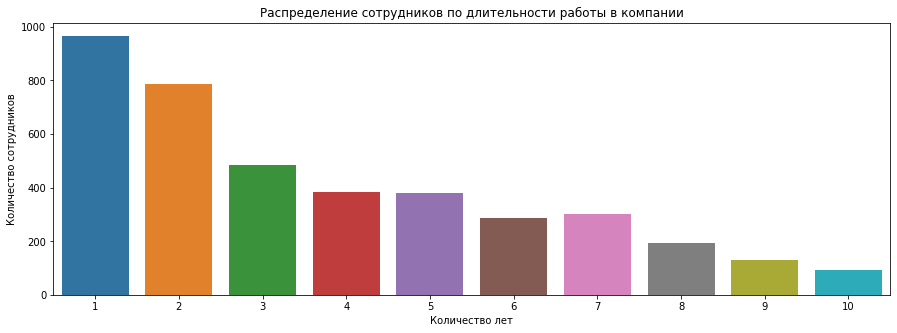

In [32]:
#hist_und_box(train_job_satisfaction_rate, 'employment_years', 'Количество лет', 'Распределение сотрудников по длительности работы в компании')
countplot_creator(train_job_satisfaction_rate, 'employment_years', 'Распределение сотрудников по длительности работы в компании', 'Количество сотрудников', 'Количество лет')

Чем больше значение, тем меньше сотрудников.

**supervisor_evaluation:**

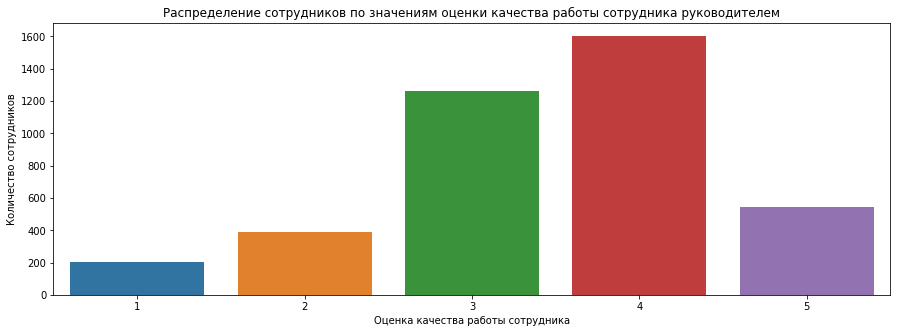

In [33]:
#hist_und_box(train_job_satisfaction_rate, 'supervisor_evaluation', 'Оценка качества работы сотрудника', 'Распределение сотрудников по значениям оценки качества работы сотрудника руководителем')
countplot_creator(train_job_satisfaction_rate, 'supervisor_evaluation', 'Распределение сотрудников по значениям оценки качества работы сотрудника руководителем', 'Количество сотрудников', 'Оценка качества работы сотрудника')

Распределение похоже на нормальное, смещено вправо. Неудовлетворительные оценки в меньшинстве.

**salary:**

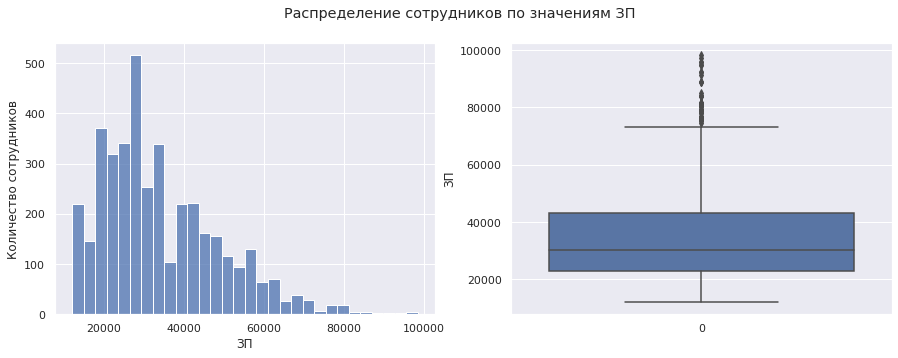

In [34]:
hist_und_box(train_job_satisfaction_rate, 'salary', 'ЗП', 'Распределение сотрудников по значениям ЗП')

Как мы предположили ранее, большие суммы заработной платы (примерно больше 75000) довольно редкие. Но, тем не менее, достоверные, трогать их не будем.

**job_satisfaction_rate:**

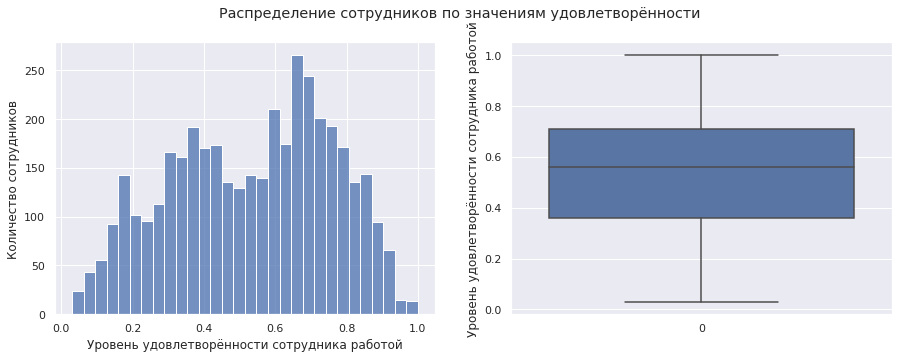

In [35]:
hist_und_box(train_job_satisfaction_rate, 'job_satisfaction_rate', 'Уровень удовлетворённости сотрудника работой', 'Распределение сотрудников по значениям удовлетворённости')

Распределение похоже на нормальное, но как-будто имеет несколько пиков. Возможно пики коррелируют с уровнем загруженности или занимаемой должности.

In [36]:
# Функция для построения гистограммы и диаграммы размаха.
def hist_und_box_split(df, column, axes_name, title, hue_column):
    sns.set(rc={'figure.figsize': (15, 5)})
    fig, axes = plt.subplots(1, 2)
    
    sns.histplot(data=df, bins=30, x=column, ax=axes[0], hue=hue_column)
    axes[0].set(ylabel='Количество клиентов', xlabel=axes_name)
    
    sns.boxplot(data=df[column], ax=axes[1])
    axes[1].set(ylabel=axes_name)
    
    plt.suptitle(title)
    plt.show()

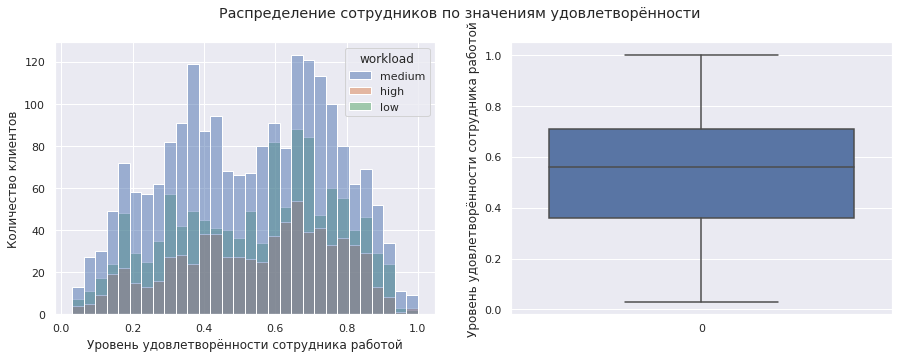

In [37]:
hist_und_box_split(train_job_satisfaction_rate, 'job_satisfaction_rate', 'Уровень удовлетворённости сотрудника работой', 'Распределение сотрудников по значениям удовлетворённости', 'workload')

Загруженность вычёркиваем.

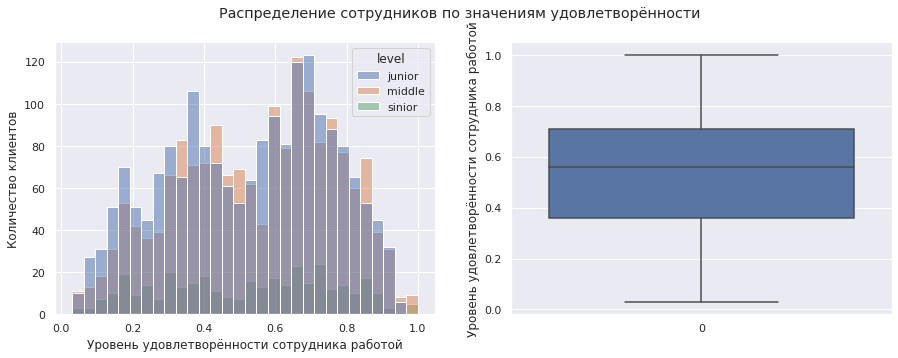

In [38]:
hist_und_box_split(train_job_satisfaction_rate, 'job_satisfaction_rate', 'Уровень удовлетворённости сотрудника работой', 'Распределение сотрудников по значениям удовлетворённости', 'level')

Уровень занимаемой должности тоже не показывает заметного влияния на распределение. Может быть, пики связаны с какими-то особенностями опроса, который проходили сотрудники.

In [39]:
# Функция для построения круговой диаграммы.
def pieplot_bin_creator(df, column, title):
    df_var = df.groupby(column)['id'].count()
    
    plt.pie(df_var, labels=df_var.index, colors=("cyan", "lightgreen"), autopct='%1.2f%%')
    plt.title(title)
    plt.show()

**last_year_promo:**

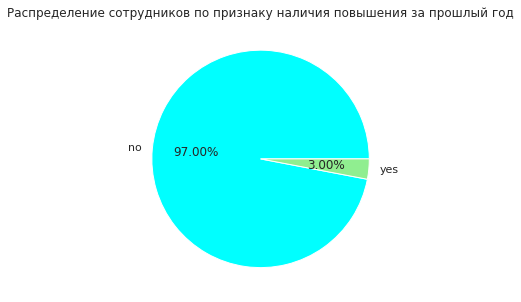

In [40]:
pieplot_bin_creator(train_job_satisfaction_rate, 'last_year_promo', 'Распределение сотрудников по признаку наличия повышения за прошлый год')

Доля положительных значений довольна мала, всего 3%.

**last_year_violations:**

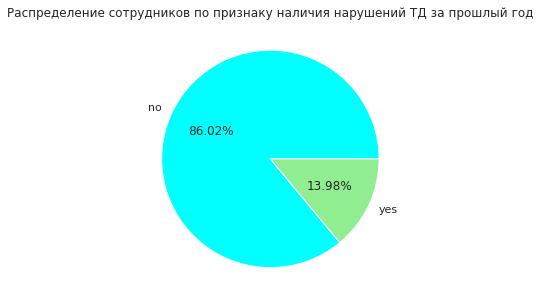

In [41]:
pieplot_bin_creator(train_job_satisfaction_rate, 'last_year_violations', 'Распределение сотрудников по признаку наличия нарушений ТД за прошлый год')

In [42]:
# Функция для построения круговой диаграммы.
def pieplot_creator(df, column, title):
    df_var = df.groupby(column)['id'].count()
    
    plt.pie(df_var, labels=df_var.index, colors=("cyan", "lightgreen", "beige"), autopct='%1.2f%%')
    plt.title(title)
    plt.show()

**level:**

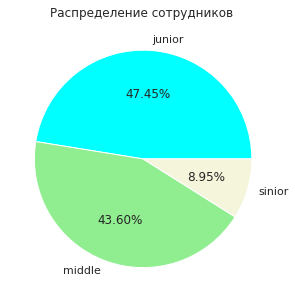

In [43]:
pieplot_creator(train_job_satisfaction_rate, 'level', 'Распределение сотрудников ')

**workload:**

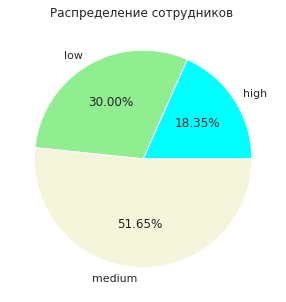

In [44]:
pieplot_creator(train_job_satisfaction_rate, 'workload', 'Распределение сотрудников ')

**dept:**

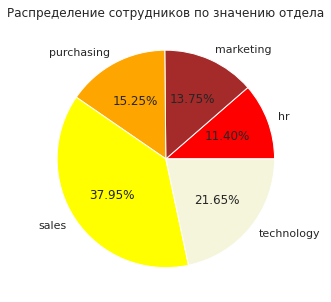

In [45]:
df_var = train_job_satisfaction_rate.groupby('dept')['id'].count()
    
plt.pie(df_var, labels=df_var.index, colors=("red", "brown", "orange", "yellow", "beige"), autopct='%1.2f%%')
plt.title('Распределение сотрудников по значению отдела')
plt.show()

**Промеуточный вывод:**

- **employment_years:** значения от 1-го года до 10-ти лет. Чем больше значение, тем меньше сотрудников.
- **supervisor_evaluation:** значения от 1-го до 5-ти. Распределение похоже на нормальное, смещено вправо. Неудовлетворительные оценки в меньшинстве.
- **salary:** значения от 12000 до 98400. Как мы предположили ранее, большие суммы заработной платы (примерно больше 75000) довольно редкие. 
- **job_satisfaction_rate:** значения от 0.03 до 1. Распределение похоже на нормальное, но как-будто имеет несколько пиков. Возможно, пики связаны с какими-то особенностями опроса, который проходили сотрудники.
- **dept:** значения отдела распределены следующим образом: hr — 11.42%, marketing — 13.77%, purchasing — 15.27%, sales — 37.86%, technology — 21.68%.
- **level:** значения уровня занимаемой должности: senior— 8.96%, junior — 47.4%, middle — 43.64%.
- **workload:** значения уровня загруженности: high — 18.35%, low — 30%, medium — 51.65%.
- **last_year_promo:** значения наличия повышения: no — 97%, yes — 3%.
- **last_year_violations:** значения наличия нарушений: no — 86.02%, yes — 13.98%.

[Назад к содержанию](#0)

#### Анализ тестовой выборки
<a id="3.1.2"><a/>

Важно убедиться, что данные имеют сходный характер распределения с тренировочными. 

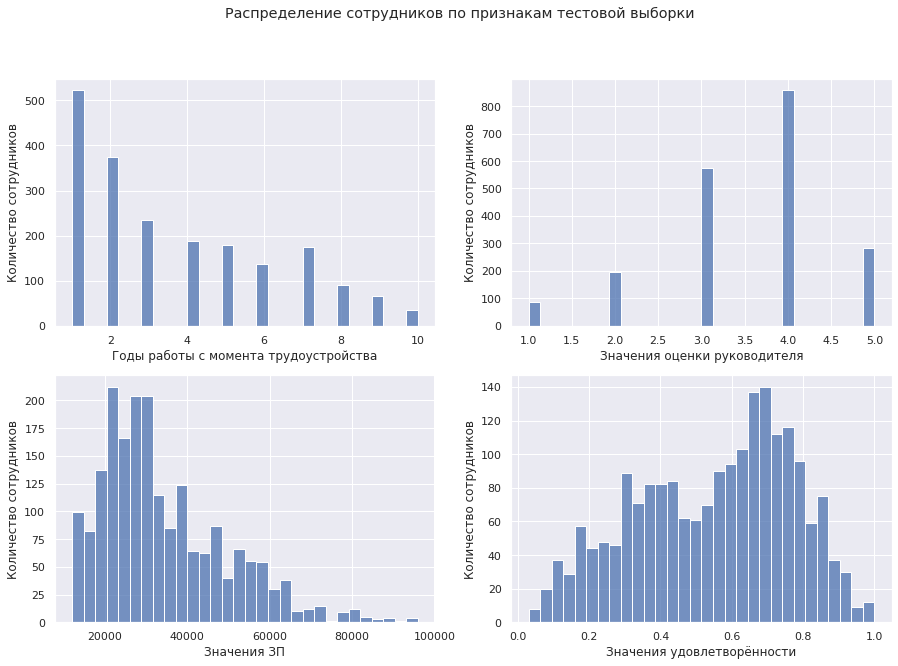

In [46]:
sns.set(rc={'figure.figsize': (15, 10)})
fig, axs = plt.subplots(2, 2)
    
sns.histplot(data=test_features, bins=30, x='employment_years', ax=axs[0, 0])
axs[0, 0].set(ylabel='Количество cотрудников', xlabel='Годы работы с момента трудоустройства')
    
sns.histplot(data=test_features, bins=30, x='supervisor_evaluation', ax=axs[0, 1])
axs[0, 1].set(ylabel='Количество cотрудников', xlabel='Значения оценки руководителя')

sns.histplot(data=test_features, bins=30, x='salary', ax=axs[1, 0])
axs[1, 0].set(ylabel='Количество cотрудников', xlabel='Значения ЗП')

sns.histplot(data=test_target_job_satisfaction_rate, bins=30, x='job_satisfaction_rate', ax=axs[1, 1])
axs[1, 1].set(ylabel='Количество cотрудников', xlabel='Значения удовлетворённости')
    
plt.suptitle('Распределение сотрудников по признакам тестовой выборки')
plt.show()

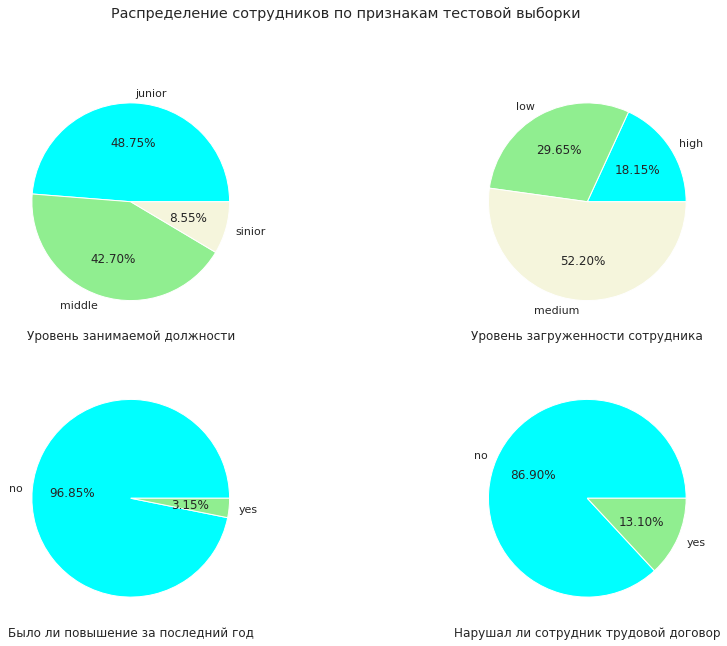

In [47]:
sns.set(rc={'figure.figsize': (15, 10)})
fig, axs = plt.subplots(2, 2)
    
df_var = test_features.groupby('level')['id'].count()
axs[0, 0].pie(df_var, labels=df_var.index, colors=("cyan", "lightgreen", "beige"), autopct='%1.2f%%')
axs[0, 0].set(xlabel='Уровень занимаемой должности')
    
df_var = test_features.groupby('workload')['id'].count()
axs[0, 1].pie(df_var, labels=df_var.index, colors=("cyan", "lightgreen", "beige"), autopct='%1.2f%%')
axs[0, 1].set(xlabel='Уровень загруженности сотрудника')

df_var = test_features.groupby('last_year_promo')['id'].count()
axs[1, 0].pie(df_var, labels=df_var.index, colors=("cyan", "lightgreen", "beige"), autopct='%1.2f%%')
axs[1, 0].set(xlabel='Было ли повышение за последний год')

df_var = test_features.groupby('last_year_violations')['id'].count()
axs[1, 1].pie(df_var, labels=df_var.index, colors=("cyan", "lightgreen", "beige"), autopct='%1.2f%%')
axs[1, 1].set(xlabel='Нарушал ли сотрудник трудовой договор')
    
plt.suptitle('Распределение сотрудников по признакам тестовой выборки')
plt.show()

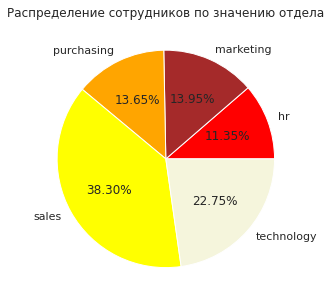

In [48]:
sns.set(rc={'figure.figsize': (15, 5)})
df_var = test_features.groupby('dept')['id'].count()
    
plt.pie(df_var, labels=df_var.index, colors=("red", "brown", "orange", "yellow", "beige"), autopct='%1.2f%%')
plt.title('Распределение сотрудников по значению отдела')
plt.show()

Характер распределения сходный.

[Назад к содержанию](#0)

### Анализ данных для задачи предсказания увольнения
<a id="3.2"><a/>

Изучим распределения и попробуем собрать общий портрет уволившихся сотрудников.

In [49]:
# Функция для построения гистограммы и диаграммы размаха.
def hist_und_box_split(df, column, axes_name, title):
    sns.set(rc={'figure.figsize': (15, 5)})
    fig, axes = plt.subplots(1, 2)
    
    sns.histplot(data=df, bins=30, x=column, ax=axes[0], hue='quit')
    axes[0].set(ylabel='Количество клиентов', xlabel=axes_name)
    
    sns.boxplot(data=df[column], ax=axes[1])
    axes[1].set(ylabel=axes_name)
    
    plt.suptitle(title)
    plt.show()

In [50]:
# Функция для построения столбчатой диаграммы.
def countplot_creator(df, column, title, ylabel, xlabel):
    #sns.set_style('whitegrid')
    plt.figure(figsize=(15, 5))
    
    sns.countplot(data=df, x=column, hue='quit');
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

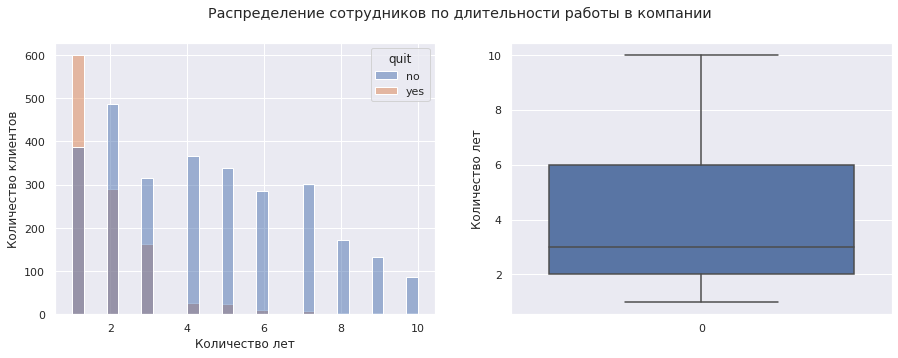

In [51]:
hist_und_box_split(train_quit, 'employment_years', 'Количество лет', 'Распределение сотрудников по длительности работы в компании')

Доля уволившихся сотрудников значительнно уменьшается среди сотрудников, проработавших в компании больше трёх лет. Чаще всего увольняются в первые три года, после одного года работы увольняются даже чаще, чем остаются.

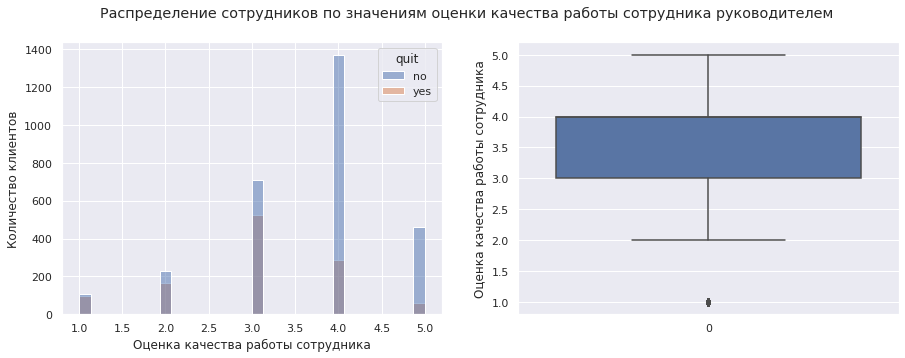

In [52]:
hist_und_box_split(train_quit, 'supervisor_evaluation', 'Оценка качества работы сотрудника', 'Распределение сотрудников по значениям оценки качества работы сотрудника руководителем')

Большая доля увольняющихся получает от руководителя оценку работы не выше 3-ёх. Для компании, вероятно, было бы предпочтительней удерживать работников с хотя бы удовлетворительной оценкой.

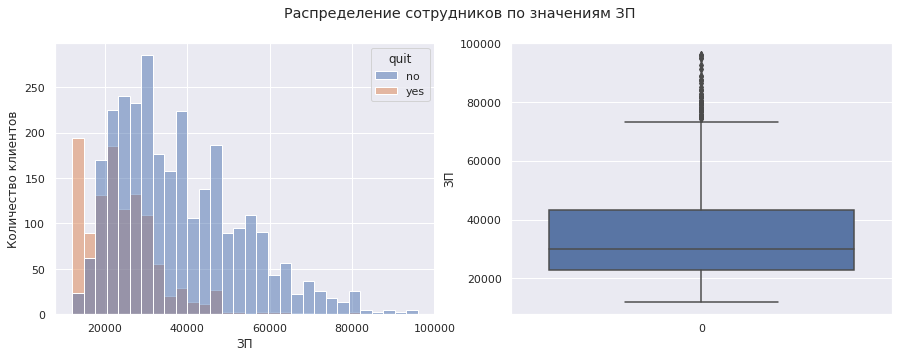

In [53]:
hist_und_box_split(train_quit, 'salary', 'ЗП', 'Распределение сотрудников по значениям ЗП')

У увольняющихся сотрудников ЗП ниже. Чаще всего не больше 35000.

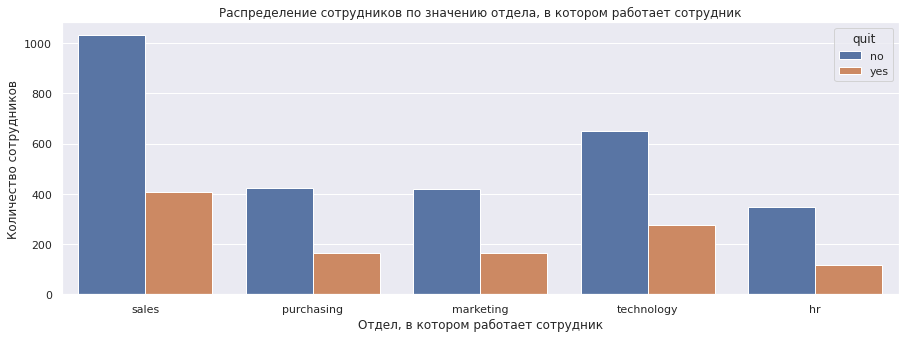

In [54]:
countplot_creator(train_quit, 'dept', 'Распределение сотрудников по значению отдела, в котором работает сотрудник', 'Количество сотрудников', 'Отдел, в котором работает сотрудник')

Доля увольняющихся примерно равна во всех отделах. <font color='green'>Больше половины уволившихся сотрудников работали в отделах продаж и технологий. Взглянем на разницу между отделами более детально.</font>

mean median
                       salary salary
quit dept                           
no   hr          37324.137931  34800
     marketing   39161.813842  36000
     purchasing  35840.758294  33600
     sales       35278.370514  33600
     technology  42003.680982  38400
yes  hr          22520.689655  22200
     marketing   24058.895706  24000
     purchasing  23378.313253  21600
     sales       21832.923833  20400
     technology  27686.956522  26400

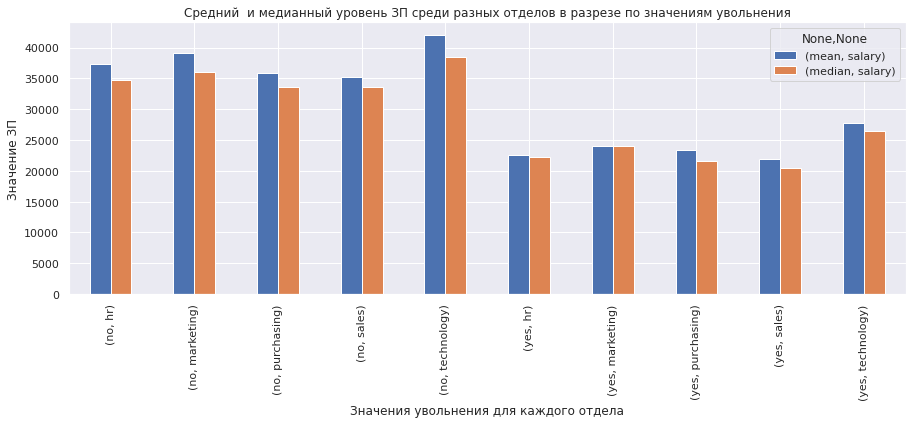

In [55]:
display(train_quit.pivot_table(index=['quit', 'dept'], values = 'salary', aggfunc=['mean', 'median']))
train_quit.pivot_table(index=['quit', 'dept'], values = 'salary', aggfunc=['mean', 'median']).plot(kind='bar')
plt.xlabel('Значения увольнения для каждого отдела')
plt.ylabel('Значение ЗП')
plt.title('Средний  и медианный уровень ЗП среди разных отделов в разрезе по значениям увольнения');

<font color='green'>Средний уровень выплат среди уволившихся в отделе продаж самый низкий. Вероятно, это основная причина большого числа увольнений в этом отделе.
</font>

level            junior  middle  sinior
quit dept                              
no   hr             119     189      40
     marketing      134     236      49
     purchasing     145     219      58
     sales          332     584     115
     technology     216     358      78
yes  hr             100      15       1
     marketing      148      14       1
     purchasing     143      17       6
     sales          367      36       4
     technology     245      26       5

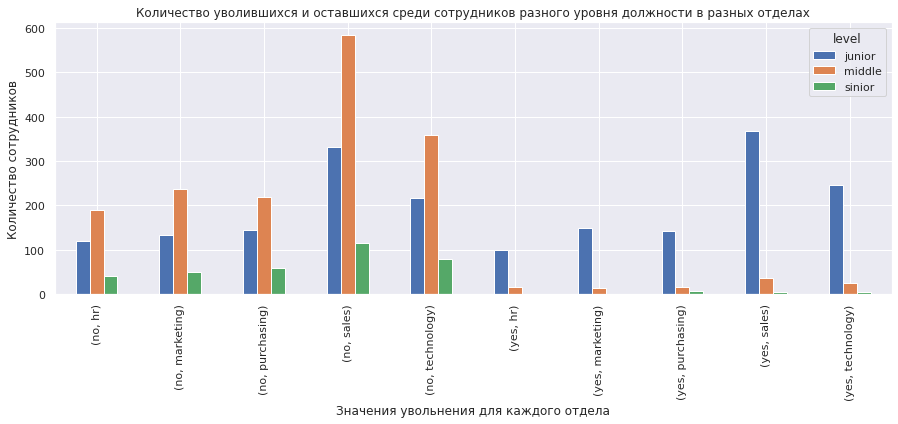

In [56]:
display(train_quit.pivot_table(index=['quit', 'dept'], values = 'id', columns='level', aggfunc='count'))
train_quit.pivot_table(index=['quit', 'dept'], values = 'id', columns='level', aggfunc='count').plot(kind='bar')
plt.xlabel('Значения увольнения для каждого отдела')
plt.ylabel('Количество сотрудников')
plt.title('Количество уволившихся и оставшихся среди сотрудников разного уровня должности в разных отделах');

<font color='green'>Ещё раз подтвердили, что основная часть уволившихся — сотрудники младшего уровня.
</font>

workload         high  low  medium
quit dept                         
no   hr            66   78     204
     marketing     89  102     228
     purchasing    71   98     253
     sales        208  246     577
     technology   119  165     368
yes  hr             7   65      44
     marketing     20   71      72
     purchasing    21   75      70
     sales         43  187     177
     technology    30  121     125

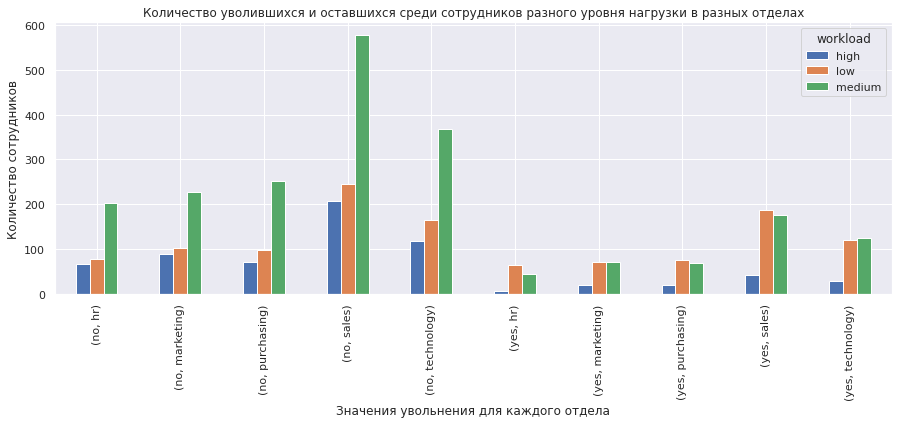

In [57]:
display(train_quit.pivot_table(index=['quit', 'dept'], values = 'id', columns='workload', aggfunc='count'))
train_quit.pivot_table(index=['quit', 'dept'], values = 'id', columns='workload', aggfunc='count').plot(kind='bar')
plt.xlabel('Значения увольнения для каждого отдела')
plt.ylabel('Количество сотрудников')
plt.title('Количество уволившихся и оставшихся среди сотрудников разного уровня нагрузки в разных отделах');

<font color='green'>Основная масса уволившися имели низкий или средний уровень рабочей нагрузки.
</font>

supervisor_evaluation   1   2    3    4    5
quit dept                                   
no   hr                13  27  110  148   50
     marketing         13  25   92  217   72
     purchasing        23  38  117  187   57
     sales             34  88  234  499  176
     technology        24  49  157  317  105
yes  hr                 9  18   49   38    2
     marketing         12  19   87   33   12
     purchasing        17  23   76   43    7
     sales             33  52  200   95   27
     technology        24  52  111   77   12

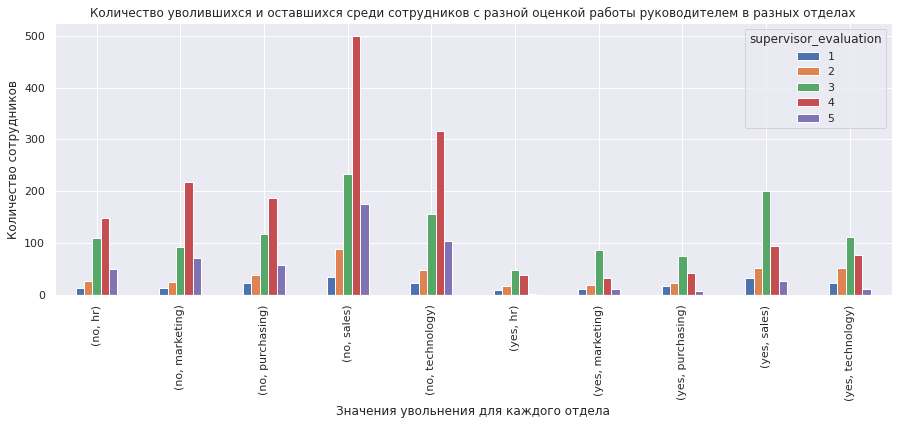

In [58]:
display(train_quit.pivot_table(index=['quit', 'dept'], values = 'id', columns='supervisor_evaluation', aggfunc='count'))
train_quit.pivot_table(index=['quit', 'dept'], values = 'id', columns='supervisor_evaluation', aggfunc='count').plot(kind='bar')
plt.xlabel('Значения увольнения для каждого отдела')
plt.ylabel('Количество сотрудников')
plt.title('Количество уволившихся и оставшихся среди сотрудников с разной оценкой работы руководителем в разных отделах');

<font color='green'>Чаще всего увольняющиеся имеют средний уровень оценки работы. Отделы продаж и технологий чаще других теряют перспективных работников.
</font>

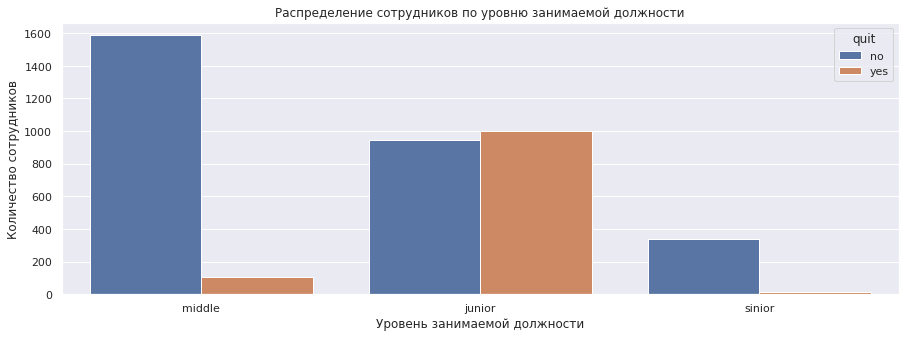

In [59]:
countplot_creator(train_quit, 'level', 'Распределение сотрудников по уровню занимаемой должности', 'Количество сотрудников', 'Уровень занимаемой должности')

Основная доля увольняющихся занимает младшие должности.

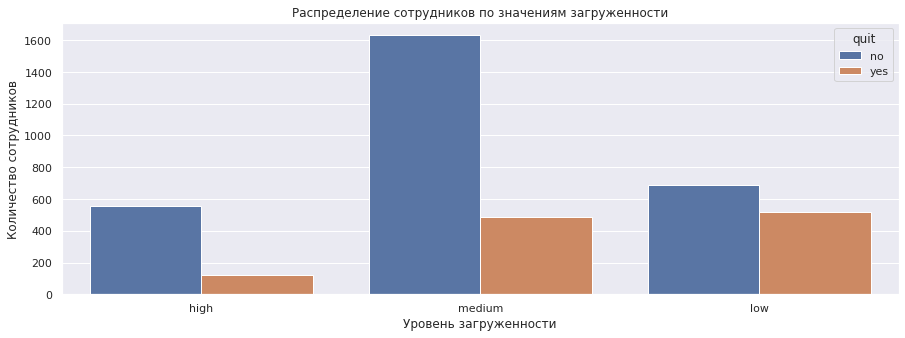

In [60]:
countplot_creator(train_quit, 'workload', 'Распределение сотрудников по значениям загруженности', 'Количество сотрудников', 'Уровень загруженности')

Доля увольняющихся с низкой загруженностью почти такая же, как у не уволившихся сотрудников. Вероятно это связано с тем, что большая часть увольняющихся являются младшими сотрудниками, которым доверяют меньше сложных задач.

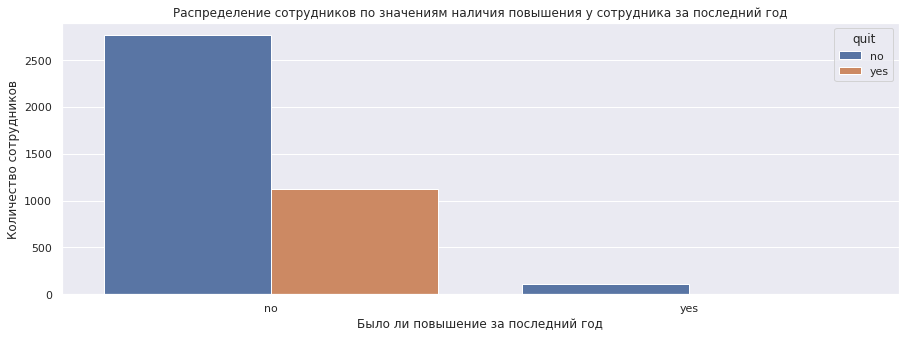

In [61]:
countplot_creator(train_quit, 'last_year_promo', 'Распределение сотрудников по значениям наличия повышения у сотрудника за последний год', 'Количество сотрудников', 'Было ли повышение за последний год')

Среди получивших повышение за последний год сотрудников уволившихся, кажется, вообще нет. Выборка, получивших повышениние, правда, очень мала. Да и в целом неплохо было бы знать, кому непосредственно дают повышение, и какая доля из этих сотрудников соответствовала до повышения общему портрету увольняющихся, который мы уже составили.

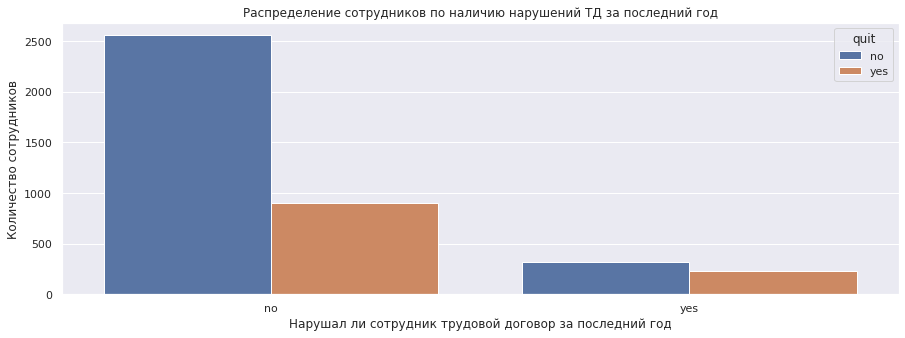

In [62]:
countplot_creator(train_quit, 'last_year_violations', 'Распределение сотрудников по наличию нарушений ТД за последний год', 'Количество сотрудников', 'Нарушал ли сотрудник трудовой договор за последний год')

Большая часть сотрудников не нарушала ТД перед увольнением. Среди нарушивших условия ТД за последний год доля уволившихся почти такая же как у оставшихся.

И ещё один момент. Аналитики компании уверены, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Если результаты опросов действительно хорошо отображают удовлетворённость сотрудников, то мы сможем визуализировать данную зависимость.

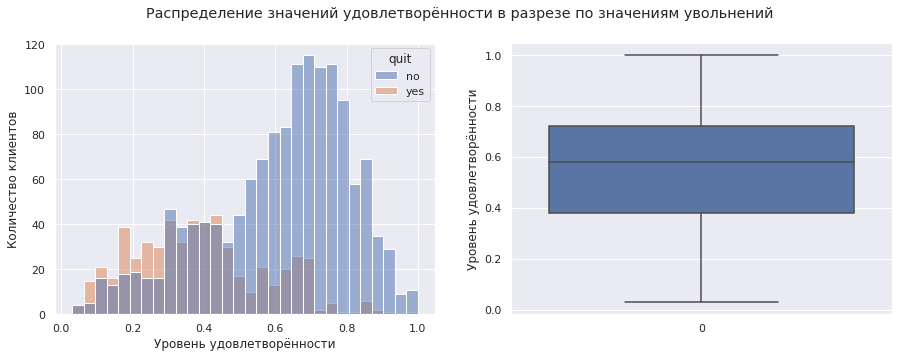

In [63]:
df_var = test_features.merge(test_target_job_satisfaction_rate, on='id')
df_var = df_var.merge(test_target_quit, on='id')

hist_und_box_split(df_var, 'job_satisfaction_rate', 'Уровень удовлетворённости', 'Распределение значений удовлетворённости в разрезе по значениям увольнений')

И аналитики не ошибаются. Уровень удовлетворённости у уволившихся сотрудников в среднем был ниже. 

**Итак, составим общий портрет. Чаще всего, увольняющийся сотрудник:**

- Имеет уровень занимаемой должности junior.
- Увольняется в первые три года работы. Особенно часто после первого года.
- Примерно в половине случаев такие сотрудники имеют среднюю оценку работы руководителем.
- Получают заработную плату до 35000.
- Имеет уровень удовлетворённости рабочим местом не выше 0.5.
<font color='green'>
- Вероятнее всего работает в отделе продаж или в отделе технологий. Загруженность увольняющихся работнков чаще низкая или средняя.
</font>

[Назад к содержанию](#0)

### Корреляционный анализ
<a id="3.3"><a/>

**train_job_satisfaction_rate:**

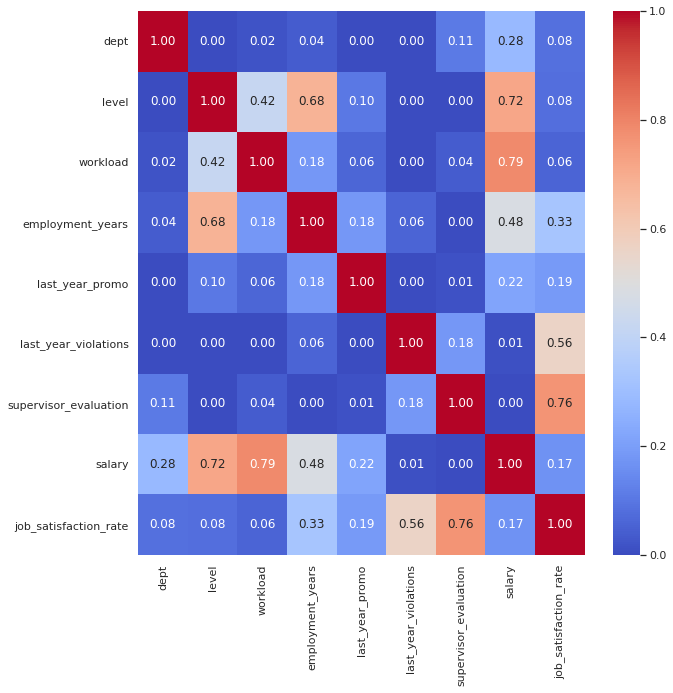

In [64]:
plt.figure(figsize=(10, 10))
sns.heatmap(train_job_satisfaction_rate.drop('id', axis=1).phik_matrix(
    interval_cols=[
        'employment_years', 
        'supervisor_evaluation', 
        'salary', 
        'job_satisfaction_rate'
    ]
), annot=True, cmap='coolwarm', fmt='.2f');

**Анализ корреляции признаков с уровнем удовлетворённости:**

- **dept:** 0.08 — связи почти нет.
- **level:** 0.08 — связи почти нет.
- **workload:** 0.06 — связи почти нет.
- **employment_years:** 0.33 — имеется умеренная связь.
- **last_year_promo:** 0.19 — слабая теснота связи.
- **last_year_violations:** 0.56 — признак заметно коррелирует с целевым.
- **supervisor_evaluation:** 0.76 — наблюдаем высокую корреляцию.
- **salary:** 0.17 — слабая теснота связи.

Мультиколлинеарности не наблюдаем.

**train_quit:**

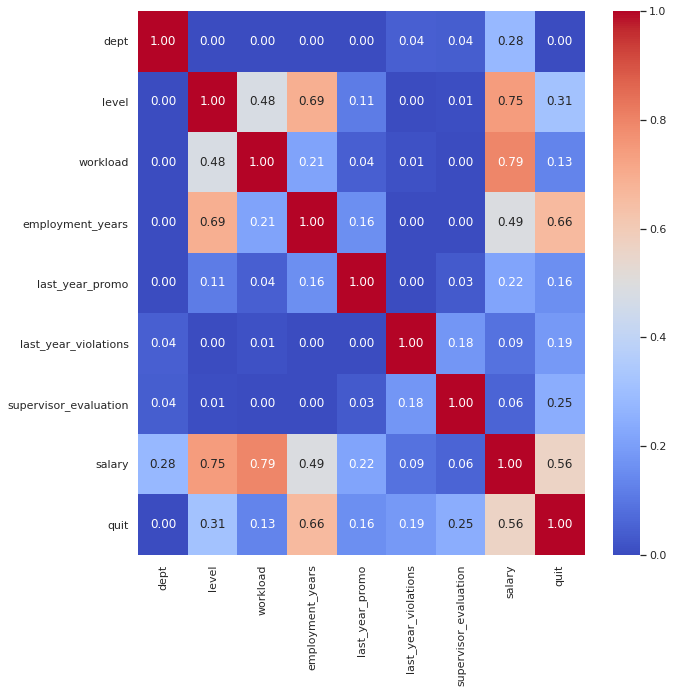

In [65]:
plt.figure(figsize=(10, 10))
sns.heatmap(train_quit.drop('id', axis=1).phik_matrix(
    interval_cols=[
        'employment_years', 
        'supervisor_evaluation', 
        'salary'
    ]
), annot=True, cmap='coolwarm', fmt='.2f');

**Анализ корреляции признаков с данными об увольнении:**

- **dept:** Нет связи с целевым.
- **level:** 0.31 — имеется умеренная связь.
- **workload:** 0.13 — слабая теснота связи.
- **employment_years:** 0.66 — признак заметно коррелирует с целевым.
- **last_year_promo:** 0.16 — слабая теснота связи.
- **last_year_violations:** 0.19 — слабая теснота связи.
- **supervisor_evaluation:** 0.25 — слабая теснота связи.
- **salary:** 0.56 — признак заметно коррелирует с целевым.

Мультиколлинеарности не наблюдаем.

[Назад к содержанию](#0)

## Пайплайны
<a id="4"><a/>

### Задача предсказания удовлетворённости
<a id="4.1"><a/>

Перед нами стоит задача предсказать непрерывный количественный признак, соответственно при моделировании будем использовать модели регрессии. Остановимся на следующих:

- Модель линейной регрессии (LinearRegression()).
- Дерево решений (DecisionTreeRegressor()).
- Случайный лес (RandomForestRegressor()).
- Метод К ближайших соседей (KNeighborsRegressor()).

In [66]:
# Зададим списки с признаками для предобработки.
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']

In [67]:
# Переназначим индексы и разделим тренировочную выборку.
X_train_sr = train_job_satisfaction_rate.drop(['id', 'job_satisfaction_rate'], axis=1)
y_train_sr = train_job_satisfaction_rate['job_satisfaction_rate']
test_sr = test_features.merge(test_target_job_satisfaction_rate, on='id')
X_test_sr = test_sr.drop(['id', 'job_satisfaction_rate'], axis=1)
y_test_sr = test_sr['job_satisfaction_rate']

In [68]:
display(X_train_sr.shape)
display(y_train_sr.shape)
display(X_test_sr.shape)
y_test_sr.shape

(4000, 8)

(4000,)

(2000, 8)

(2000,)

In [69]:
# Задаём константу.
RANDOM_STATE = 42

In [70]:
# Создаём пайплайн с кодированием признаков OneHotEncoder.
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
    ]
) 

In [71]:
# Создаём пайплайн с кодированием признаков OrdinalEncoder.
ord_pipe = Pipeline(
    [
        ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ord', 
        OrdinalEncoder(categories=[['junior', 'middle', 'sinior'], ['low', 'medium', 'high']], handle_unknown='use_encoded_value', unknown_value=np.nan)),
        ('simple_Imputer',
        SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [72]:
# Объединим шаги по подготовке данных.
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns),
    ], 
    remainder='passthrough'
)

In [73]:
# Cоздаём итоговый пайплайн.
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', LinearRegression())
    ]
) 

In [74]:
# Зададим гиперпараметры для моделей.
param_grid = [
    
    # словарь для модели LinearRegression()
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели DecisionTreeRegressor()
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(4, 10),
        'models__max_features': range(4, 10),
        'models__min_samples_leaf': range(1, 6),
        'models__min_samples_split': range(2, 6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
    },
    
    # словарь для модели RandomForestRegressor()
    {
        'models': [RandomForestRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 21),
        'models__max_features': range(4, 10),
        'models__min_samples_leaf': range(1, 6),
        'models__min_samples_split': range(2, 6),
        'models__n_estimators': range(10, 100),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
    },
    
    # словарь для модели KNeighborsRegressor() 
    {
        'models': [KNeighborsRegressor(n_jobs=-1, weights='distance')],
        'models__n_neighbors': range(4, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

Для оценки качества модели создадим собственную метрику SMAPE (англ. symmetric mean absolute percentage error, «симметричное среднее абсолютное процентное отклонение»).

In [75]:
def smape(y_test, y_pred):
    return 100 * np.mean(np.abs(y_pred - y_test) / ((np.abs(y_pred) + np.abs(y_test))/2))
    
smape_score = make_scorer(smape, greater_is_better=False)

In [76]:
# Инициализируем класс для рандомизированного поиска гиперпараметров.
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid,
    cv=5,
    scoring=smape_score,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

randomized_search.fit(X_train_sr, y_train_sr)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pip...
                                         'models__n_estimators': range(10, 100),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [KNeighborsRegressor(n_jobs=-1,
                                                                        weights='distance')],
                                         'models__n_neighbors': range(4, 20),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42,
                   scoring=make_scorer(smape, greater_is_better=False, response_method='predict'))

In [77]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на кросс-валидации:', (-1) * randomized_search.best_score_)

y_test_pred_sr = randomized_search.predict(X_test_sr)
print(f'Метрика SMAPE на тестовой выборке: {smape(y_test_sr, y_test_pred_sr)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

**Промежуточный итог:**

На данном шаге собрали пайплайн для перебора моделей и гиперпараметров в поисках лучшей модели для решения задачи предсказания удовлетворённости сотрудников рабочим местом. Пайплайн изучил следующие модели:

- Модель линейной регрессии (LinearRegression()).
- Дерево решений (DecisionTreeRegressor()).
- Случайный лес (RandomForestRegressor()).
- Метод К ближайших соседей (KNeighborsRegressor()).

В результате подбора гиперпараметров лучший результат по метрике SMAPE показала модель случайного леса со следующими гиперпараметрами: 

- Максимальная глубина — 18.
- Обучение на 4-ёх признаках.
- Число деревьев — 29.
- Минимальное количество образцов, необходимое для разбиения внутреннего узла каждого дерева — 5.
- Масштабирование количественных признаков выполнено с помощью StandardScaler.

Метрика лучшей модели на кросс-валидации: 13.661717485916071

Метрика SMAPE на тестовой выборке: 12.58016781246023

[Назад к содержанию](#0)

### Задача предсказания увольнения
<a id="4.2"><a/>

Перед нами стоит задача бинарной классификации, соответственно переберём следующие модели:

- Модель логистической регресии (LogisticRegression).
- Дерево решений (DecisionTreeClassifier).
- Случайный лес (RandomForestClassifier).
- Метод К ближайших соседей (KNeighborsClassifier).

Уровень удовлетворённости по результатам исследовательского анализа показал нам заметную разницу между значениями целевого признака, поэтому добавим предсказанные значения удовлетворённости в набор входных признаков.

In [78]:
# Предскажем удовлетворённость и соберём тренировчный датасет train_qp.
train_quit_pred_sr = randomized_search.predict(train_quit.drop(['id', 'quit'], axis=1))
train_quit_pred_sr_ser = pd.DataFrame({'sr_pred': train_quit_pred_sr})
train_qp = pd.concat([train_quit, train_quit_pred_sr_ser], axis=1)

# Взглянем на результат.
train_qp.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,sr_pred
0,723290,sales,middle,high,2,no,no,4,54000,no,0.626701
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.824199
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.390366
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.333260
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.739706


Предсказания для тестовой выборки мы получили на этапе оценки качества лучшей модели для предсказания удовлетворённости. Остаётся только добавить данные в датасет с входными признаками.

In [79]:
test_quit_pred_sr_ser = pd.DataFrame({'sr_pred': y_test_pred_sr})
test_qp = pd.concat([test_features, test_quit_pred_sr_ser], axis=1)

test_qp.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,sr_pred
0,485046,marketing,junior,medium,2,no,no,5,28800,0.852474
1,686555,hr,junior,medium,1,no,no,4,30000,0.683938
2,467458,sales,middle,low,5,no,no,4,19200,0.655430
3,418655,sales,middle,low,6,no,no,4,19200,0.663524
4,789145,hr,middle,medium,5,no,no,5,40800,0.783158


In [80]:
# Закодируем целевой признак.
labelencoder = LabelEncoder()

train_qp['quit_coded'] = labelencoder.fit_transform(train_qp['quit'])

In [81]:
# Разделим тренировочную выборку.
#train_qp['quit_coded'] = train_qp['quit'].apply(target_encoder)
X_train_qp = train_qp.drop(['id', 'quit', 'quit_coded'], axis=1)
y_train_qp = train_qp['quit_coded']

# Синхронизируем индексы тестовой выборки и вновь разделим выборку.
test_qp = test_qp.merge(test_target_quit, on='id')

test_qp['quit_coded'] = labelencoder.transform(test_qp['quit'])
X_test_qp = test_qp.drop(['id', 'quit', 'quit_coded'], axis=1)
y_test_qp = test_qp['quit_coded']

display(X_train_qp.shape)
display(y_train_qp.shape)
display(X_test_qp.shape)
y_test_qp.shape

(4000, 9)

(4000,)

(2000, 9)

(2000,)

In [82]:
X_train_qp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   4000 non-null   object 
 1   level                  4000 non-null   object 
 2   workload               4000 non-null   object 
 3   employment_years       4000 non-null   int64  
 4   last_year_promo        4000 non-null   object 
 5   last_year_violations   4000 non-null   object 
 6   supervisor_evaluation  4000 non-null   int64  
 7   salary                 4000 non-null   int64  
 8   sr_pred                4000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 281.4+ KB


In [83]:
# Обновим список количественных признаков.
num_columns = ['employment_years', 'supervisor_evaluation', 'salary', 'sr_pred']

In [84]:
# Cоздаём итоговый пайплайн.
pipe_final_qp = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
) 

In [85]:
# Зададим гиперпараметры для моделей.
param_grid_qp = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 20),
        'models__max_features': range(2, 10),
        'models__min_samples_leaf': range(1, 4),
        'models__min_samples_split': range(2, 6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='saga', 
            penalty='l1'
        )],
        'models__C': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели RandomForestClassifier()
    {
        'models': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(1, 20),
        'models__max_features': range(2, 10),
        'models__min_samples_leaf': range(1, 6),
        'models__min_samples_split': range(2, 6),
        'models__n_estimators': range(10, 50),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    }
]

In [86]:
# Инициализируем класс для рандомизированного поиска гиперпараметров.
randomized_search_qp = RandomizedSearchCV(
    pipe_final_qp, 
    param_grid_qp,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

randomized_search_qp.fit(X_train_qp, y_train_qp)

/opt/conda/lib/python3.9/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pip...
                                                               'passthrough']},
                                        {'models': [RandomForestClassifier(random_state=42)],
                                         'models__max_depth': range(1, 20),
                                         'models__max_features': range(2, 10),
                                         'models__min_samples_leaf': range(1, 6),
                                         'models__min_samples_split': range(2, 6),
                                         'models__n_estimators': range(10, 50),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [87]:
print('Лучшая модель и её параметры:\n\n', randomized_search_qp.best_estimator_)
print ('Метрика лучшей модели на кросс-валидации:', randomized_search_qp.best_score_)

y_test_pred_qp = randomized_search_qp.predict_proba(X_test_qp)[:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test_qp, y_test_pred_qp)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

**Промежуточный итог:**

Комания заинтересована в том, чтобы предсказывать: уволится ли работник или нет. Иными словами, перед нами была поставлена задача бинарной классификации. Перед обучением модели мы ввели во входные данные предсказанный лучшей моделью из предыдущего шага признак удовлетворённости рабочим местом, так как убедились, что он напрямую влияет на целевой признак.

Для подбора лучшего решения был создан пайплайн, который перебрал следующие модели:

- Модель логистической регресии (LogisticRegression).
- Дерево решений (DecisionTreeClassifier).
- Случайный лес (RandomForestClassifier).
- Метод К ближайших соседей (KNeighborsClassifier).

Собранный пайплайн показал лучшее значение метрики ROC-AUC на модели случайного леса со следующими гиперпараметрами:

- Максимальная глубина — 14.
- Обучение деревьев на 3-ёх признаках.
- Минимальное количество образцов, необходимое для нахождения в листовом узле каждого дерева — 4.
- Минимальное количество образцов, необходимое для разбиения внутреннего узла каждого дерева — 5.
- Число деревьев — 47.

Метрика лучшей модели на кросс-валидации: 0.9371157494000268

Метрика ROC-AUC на тестовой выборке: 0.9284526314229835

[Назад к содержанию](#0)

## Общий вывод
<a id="5"><a/>

HR-аналитики компании «Работа с заботой» заинтересованы в том, чтобы эффективнее бороться с оттоком сотрудников у своих клиентов. Исходя из этой цели, были сформированы основые задачи проекта:

- Первая задача — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика.
- Вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

**Для выполнения задач были проделаны следующие шаги:**

**1 Загрузка данных**

Исходные данные передали следующим переменным:

- **train_job_satisfaction_rate**: тренировочная выборка для задачи предсказания удовлетворённости.
- **test_features**: тестовая выборка.
- **test_target_job_satisfaction_rate**: целевой признак тестовой выборки для задачи предсказания удовлетворённости.
- **train_quit**: тренировочная выборка для задачи предсказания увольнения.
- **test_target_quit**: целевой признак тестовой выборки для задачи предсказания увольнения.

**train_job_satisfaction_rate**:

- Датафрейм **train_job_satisfaction_rate** содержит 4000 уникальных строк и 10 признаков.
- Имеются пропуски в значениях признаков **dept** и **level**.

**test_features**:

- Датафрейм **test_features** содержит 2000 строк и 9 признаков.
- Имеются пропуски в признаках **dept** и **level**.
- В значениях признаков **dept** и **workload** имеются значения с пробелом.

**test_target_job_satisfaction_rate**:
- Датафрейм содержит 2000 строк, среди признаков уникальные идентифекаторы сотрудников и значения целевого признака **job_satisfaction_rate**.

Датафрейм **train_quit** содержит 4000 строк и 10 признаков.

Датафрейм **test_target_quit** содержит 2000 строк, среди признаков представлены уникальные идентификаторы сотрудников и значения целевого признака **quit**.

**2 Предобработка данных**

По итогу предобработки с помощью пайплайна заполнены пропуски в данных.

**3 Исследовательский анализ**

Установили следующий характер распределения данных:

- **employment_years:** значения от 1-го года до 10-ти лет. Чем больше значение, тем меньше сотрудников.
- **supervisor_evaluation:** значения от 1-го до 5-ти. Распределение похоже на нормальное, смещено вправо. Неудовлетворительные оценки в меньшинстве.
- **salary:** значения от 12000 до 98400. Как мы предположили ранее, большие суммы заработной платы (примерно больше 75000) довольно редкие. 
- **job_satisfaction_rate:** значения от 0.03 до 1. Распределение похоже на нормальное, но как-будто имеет несколько пиков. Возможно, пики связаны с какими-то особенностями опроса, который проходили сотрудники.
- **dept:** значения отдела распределены следующим образом: hr — 11.42%, marketing — 13.77%, purchasing — 15.27%, sales — 37.86%, technology — 21.68%.
- **level:** значения уровня занимаемой должности: senior— 8.96%, junior — 47.4%, middle — 43.64%.
- **workload:** значения уровня загруженности: high — 18.35%, low — 30%, medium — 51.65%.
- **last_year_promo:** значения наличия повышения: no — 97%, yes — 3%.
- **last_year_violations:** значения наличия нарушений: no — 86.02%, yes — 13.98%.

Составили следующий общий портрет увольняющихся сотрудников:

- Чаще всего имеет уровень занимаемой должности junior.
- Увольняется в первые три года работы. Особенно часто после первого года.
- Примерно в половине случаев такие сотрудники имеют среднюю оценку работы руководителем.
- Получают заработную плату до 35000.
- Имеют уровень удовлетворённости рабочим местом не выше 0.5.
<font color='green'>
- Вероятнее всего работает в отделе продаж или в отделе технологий. Загруженность увольняющихся работнков чаще низкая или средняя.
</font>

Установили следующую корреляцию входных признаков с целевым:

Корреляция с признаком **job_satisfaction_rate**:

- **dept:** 0.08 — связи почти нет.
- **level:** 0.08 — связи почти нет.
- **workload:** 0.06 — связи почти нет.
- **employment_years:** 0.33 — имеется умеренная связь.
- **last_year_promo:** 0.19 — слабая теснота связи.
- **last_year_violations:** 0.56 — признак заметно коррелирует с целевым.
- **supervisor_evaluation:** 0.76 — наблюдаем высокую корреляцию.
- **salary:** 0.17 — слабая теснота связи.

Корреляция с признаком **quit**:

- **dept:** Нет связи с целевым.
- **level:** 0.31 — имеется умеренная связь.
- **workload:** 0.13 — слабая теснота связи.
- **employment_years:** 0.66 — признак заметно коррелирует с целевым.
- **last_year_promo:** 0.16 — слабая теснота связи.
- **last_year_violations:** 0.19 — слабая теснота связи.
- **supervisor_evaluation:** 0.25 — слабая теснота связи.
- **salary:** 0.56 — признак заметно коррелирует с целевым.

**4 Использование пайплайнов**

Для решения первой задачи собрали пайплайн для перебора моделей и гиперпараметров в поисках лучшей модели для решения задачи предсказания удовлетворённости сотрудников рабочим местом. Пайплайн изучил следующие модели:

- Модель линейной регрессии (LinearRegression()).
- Дерево решений (DecisionTreeRegressor()).
- Случайный лес (RandomForestRegressor()).
- Метод К ближайших соседей (KNeighborsRegressor()).

В результате подбора гиперпараметров лучший результат по метрике SMAPE показала модель случайного леса со следующими гиперпараметрами: 

- Максимальная глубина — 18.
- Обучение на 4-ёх признаках.
- Число деревьев — 29.
- Минимальное количество образцов, необходимое для разбиения внутреннего узла каждого дерева — 5.
- Масштабирование количественных признаков выполнено с помощью StandardScaler.

Метрика лучшей модели на кросс-валидации: 13.661717485916071

Метрика SMAPE на тестовой выборке: 12.58016781246023

Комания заинтересована в том, чтобы предсказывать: уволится ли работник или нет. Иными словами, перед нами была поставлена задача бинарной классификации. Перед обучением следующей модели мы ввели во входные данные предсказанный лучшей моделью из предыдущего шага признак удовлетворённости рабочим местом, так как убедились, что он напрямую влияет на целевой признак.

Для подбора лучшего решения был создан пайплайн, который перебрал следующие модели:

- Модель логистической регресии (LogisticRegression).
- Дерево решений (DecisionTreeClassifier).
- Случайный лес (RandomForestClassifier).
- Метод К ближайших соседей (KNeighborsClassifier).

Собранный пайплайн показал лучшее значение метрики ROC-AUC на модели случайного леса со следующими гиперпараметрами:

- Максимальная глубина — 14.
- Обучение деревьев на 3-ёх признаках.
- Минимальное количество образцов, необходимое для нахождения в листовом узле каждого дерева — 4.
- Минимальное количество образцов, необходимое для разбиения внутреннего узла каждого дерева — 5.
- Число деревьев — 47.

Метрика лучшей модели на кросс-валидации: 0.9371157494000268

Метрика ROC-AUC на тестовой выборке: 0.9284526314229835

Основная идея модели случайного леса (RandomForest) заключается в использовании большого ансамбля решающих деревьев, каждое из которых само по себе даёт очень невысокое качество классификации, но за счёт их большого количества результат получается хорошим. Вероятно это основная суть успеха модели в обеих задачах.

Исходя из проведённого анализа можем сформировать несколько предложений:

- Удовлетворённость рабочим местом, похоже, сильно зависит от оценки работы руководителем. Молодые специалисты, надо полагать, относятся к критике даже более остро. В целом, конечно, любая критика должна подчёркивать как недостатки, так и положительные стороны, и помогать сотруднику стать лучше, как специалисту.
- Молодые специалисты с зарплатой ниже 35000 вероятнее уйдут в любое другое место с условиями хоть немного получше. Можно постараться удерживать наиболее полезных сотрудников, если ввеси систему премирования, зависящую от оценки работы руководителем.
- Очень часто специалисты уходят в первые три года работы. Опять же можно объяснить тем, что молодые специалисты не получают ожидаемого карьерного роста и уходят к конкурентам на любых чуть более привлекательных условиях. Можно попробовать ввести дополнительные условия премирования в первые три года работы, обеспечивать сотрудников дополнительными льготами.